# KNN紧邻算法的说明

- KNN（K-Nearest Neighbor）K最近邻算法


- 对于KNN紧邻算法需要说明的有如下几点：
    1. KNN紧邻算法是基于距离的算法。
    2. KNN主要用于分类。
    3. KNN是一种有监督学习。

# KNN紧邻算法

## KNN（K-Nearest Neighbor）的特点

- KNN算法没有训练过程，对一个没有标签的数据，KNN算法直接在已经标签的数据集（俗称训练集）之上对未标签的数据分类。


## KNN的算法模型

1.  假设已知训练数据集
    - $X_i= [x_{i1}, x_{i2},\dots, x_{in}], \qquad i=\{1,2,\dots, m\},  \qquad m \text{是样本的类别数}$
    - 样本总数就是$m \times n$

2. 假设需要分类的样本是$s$

3. 算法过程

    - 计算待分类样本$s$到所有训练样本的距离$D = [d_1,d_2,\dots,d_{m \times n}]$
    - 在D中取前K个比较小的距离。
    - 统计每个类别在K个较小距离中对应的样本点的数量；
    - 待分类样本就属于样本点最多的那个类别。

4. 算法例子说明：
    - 假设数据集是鸢尾花，150个样本，一共三类（假设A，B，C三类）。
    - 待分类样本$s$
    - 计算$s$到150个样本的距离（一般欧氏距离），一共得到150个距离。
    - 在150个距离中，取前K个较小距离。
    - 统计K个距离中，ABC三类占的数量。
    - 样本$s$就属于最大那个分类。

## KNN算法中K值的选择

- K紧邻算法中的K的选择对分类结果会产生比较大的影响。
    1. **K较小**
        - 预测结果对近邻的实例点非常敏感。
        - 容易发生过拟合（估计误差会增大【争对测试集】，近似误差较少【争对训练集】）
    2. **K较大**
        - 较远的训练实例也会对预测起作用
        - 使预测发生错误，k值增大模型的复杂度会下降，当K=样本数量N的时候，模型就变成单一模型。
        
- 在实际应用，K值一般选取比较下的值。

- 距离的选择在这里也显得比较重要。

## 距离的定义

- 常见的距离的定义
    - 欧氏距离(Euclidean)
    - 曼哈顿距离(Manhattan / City Block distance)
    - 切比雪夫距离(Chebyshev)
    - 闵可夫斯基距离(Minkowski)
    - 标准化欧氏距离(Standardized Euclidean)
    - 马氏距离(Mahalanobis)
    - 巴氏距离(Bhattacharyya)
    - 汉明距离(Hamming)
    - 夹角余弦(Cosine)
    - 杰卡德距离(Jaccard)
    - 皮尔逊距离(Pearson)

# KNN算法实现与应用

## KNN算法标量版本

In [194]:
import numpy as np
import sklearn.datasets as ds

def knn(train_data, train_label, sample, k):
    """
    train_data：训练集
    train_label：训练集的分类标签
    sample：待分类样本
    k：用来分类判定的前K个距离的个数
    """
    # 1. 计算待分类样本sample与所有训练集的距离
    distances = []   # 存放sample到所有训练集的距离
    for s in train_data:
        diff = (s - sample)**2
        distance = np.sqrt(diff.sum())
        distances.append(distance)
    # 2. 对距离排序（从小到大），取前K个来统计分类(返回排序后的下标)
    distances_np = np.array(distances)   # 转换为ndarray，利用其中的返回排序后的下标功能
    sorted_index = distances_np.argsort()  
    # 3. 统计前K个距离对应训练样本的分类数量
    categories = {}   # 存放前k个距离的类别统计
    for i in range(k):
        # 取排序下标，在target标签中得到类别
        idx = sorted_index[i]    # 取下标
        category = train_label[idx]   # 取列别
        if category not in categories:
            categories[category] = 0
        categories[category] += 1
    # print(categories)
    # 4. 分类数量最多的就是带分类样本的分类类别（返回类别下标）
    # 对统计的类别 categories 进行排序，其中最后一个就是最多的类别就是待分类样本的类别。
    categories_sorted = sorted(categories.items(), key= lambda x: x[1], reverse=True)   # 返回列表
    return categories_sorted[0][0]  # 第一个最大，取第一个数据的第一个值：就是类别
    
#  --- 数据加载与测试
# 数据加载
data, target = ds.load_iris(return_X_y=True)
# 使用第一个样本来测试，k=7
data, target = ds.load_iris(return_X_y=True)
knn(data, target, data[100], 7)

2

## KNN算法向量版本

In [195]:
import numpy as np
import sklearn.datasets as ds

def knn_v(train_data, train_label, sample, k):
    diff = (train_data - sample)**2
    distances = np.sqrt(diff.sum(axis=1))
    sorted_index = distances.argsort()
    categories = {}
    for i in range(k):
        category = train_label[sorted_index[i]]
        categories[category] = categories.get(category,0) + 1
    # print(categories)
    categories_sorted = sorted(categories.items(), key= lambda x: x[1], reverse=True)   # 返回列表
    return categories_sorted[0][0]  # 第一个最大，取第一个数据的第一个值：就是类别

data, target = ds.load_iris(return_X_y=True)
knn_v(data, target, data[100], 7)

2

9 296


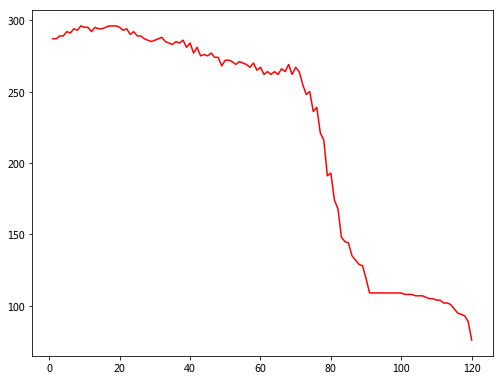

dict_keys([69, 71, 72, 55, 70, 57, 58, 65, 73, 76, 54, 59, 68, 75, 56, 66, 60, 64, 52, 53, 67, 74, 61, 63, 51, 62, 50, 47, 77, 78, 44, 48, 45, 46, 33, 49, 35, 36, 37, 38, 43, 90, 42, 31, 34, 40, 79, 105, 80, 84, 89, 91, 39, 28, 29, 41, 88, 107, 87, 27, 32, 24, 26, 92, 93, 30, 82, 83, 110, 106, 86, 85, 94, 114, 104, 23, 25, 81, 115, 117, 20, 113, 103, 19, 95, 108, 21, 22, 111, 116, 97, 98, 101, 14, 109, 112, 119, 102, 96, 18, 120, 99, 100, 1, 2, 17, 5, 12, 16, 118, 10, 6, 8, 9, 13, 15, 3, 7, 11, 4])

In [196]:
#  --- 数据加载与测试
# 数据加载
data, target = ds.load_iris(return_X_y=True)

# 生成交叉验证方案
kf = KFold(n_splits=5)
ss = ShuffleSplit(n_splits=10, test_size=0.20) 
result_split = ss.split(data)   

# 开始交叉验证
# 存放k=1，k=2，...，k=120的正确数，最高的那个k就是我们选择的k
k_rates = {}    # key对应k的值，value对应分类正确数

Ks = 120

for index_train, index_test in result_split:
    # 根据索引得到训练集与测试集
    data_train = data.take(index_train, axis=0)
    target_train = target.take(index_train)
    # 训练测试集，统计识别正确总数（对所有交叉方案统计的结果）
    for idx in index_test:
        sample = data[idx]
        # 训练取k
        for k in range(1, Ks+1):
            c = knn(data_train, target_train, sample, k)
            # 判定分类是否正确
            if c == target[idx]:  # 分类正确
                # 统计数据到k_rates
                if k not in k_rates:   # 如果字典中没有k对应的key，则增加一个
                    k_rates[k] = 0
                k_rates[k] +=1   # 正确数累加

# 选择正确最高的作为k
k_rates_sorted = sorted(k_rates.items(), key= lambda x: x[1], reverse=True)   
best_k = k_rates_sorted[0][0]
print(best_k, k_rates_sorted[0][1])

# k_rates_sorted
%matplotlib inline
import matplotlib.pyplot as plt

figure = plt.figure('KNN', figsize=(8, 6))

ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])

dict_sorted = dict(sorted(k_rates.items(), key= lambda x: x[0], reverse=False)) 

ax.plot(dict_sorted.keys(), dict_sorted.values(), color=(1, 0, 0, 1))

plt.show()
dict_data.keys()

# 交叉验证与k的选取


## 交叉验证的概念

- 交叉验证的包含两个重要的操作
    - 数据集分成两个部分：一部分用来作为训练数据集，另外一部分用来测试数据集。
    - 数据重复使用，多次训练与测试（我们把一次训练与测试称为一次验证）：在重复验证过程，某个数据在第一次验证可能是训练样本，在下一次验证有可能是测试样本。

## 交叉验证的样本选择方式

- 基本交叉验证
    - 数据集随机洗牌打乱，然后按照比例分成两部分：训练数据集与测试数据集；
    - 反复重复上述过程。

- K折交叉验证
    - 据集随机洗牌打乱，分成K份。
    - 随机的选择K-1份作为训练集，剩下的1份做测试集，这样数据集分成两个部分：训练数据集与测试数据集。
    - 重复从K分钟随机选择K-1份作为训练集，剩下的1份做测试集；（这里是对K份重复随机，不再对数据集再随机洗牌打乱）
    
    - **注意：**K折方式也可以反复调用。

- 留一交叉验证
    - 是K折交叉验证的特例，就是K = N(N是样本总数)
    - 这种情况用于样本数比较少的情况。
    
- 留P交叉验证
    - 与留一交叉验证类似，只是从训练集中剔除P个样本。

- 在sklearn提供了用户自定义数据集划分方式

## sklearn的样本切割实现

### 切割函数train_test_split

- 把数据集随机切割成两个部分

```python
    sklearn.model_selection.train_test_split(
        *arrays : sequence of indexables with same length / shape[0]   # 拆分数据集
        test_size : float, int or None, optional (default=None)   # 测试集比例
        train_size : float, int, or None, (default=None)  # 训练集比例
        shuffle : boolean, optional (default=True)    # 是否打乱
    )

```

In [197]:
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split

# 加载数据集
data,target = ds.load_iris(return_X_y=True)  

# 切分数据集
data_train, data_test, target_train, target_test = train_test_split(
    data,    # 数据集
    target,    # 数据集标签
    test_size=0.2)  

print(data_train.shape, data_test.shape)

(120, 4) (30, 4)


### 切割类KFold，LeaveOneOut，LeavePOut，ShuffleSplit

- sklearn提供了系列的切分类：
    - 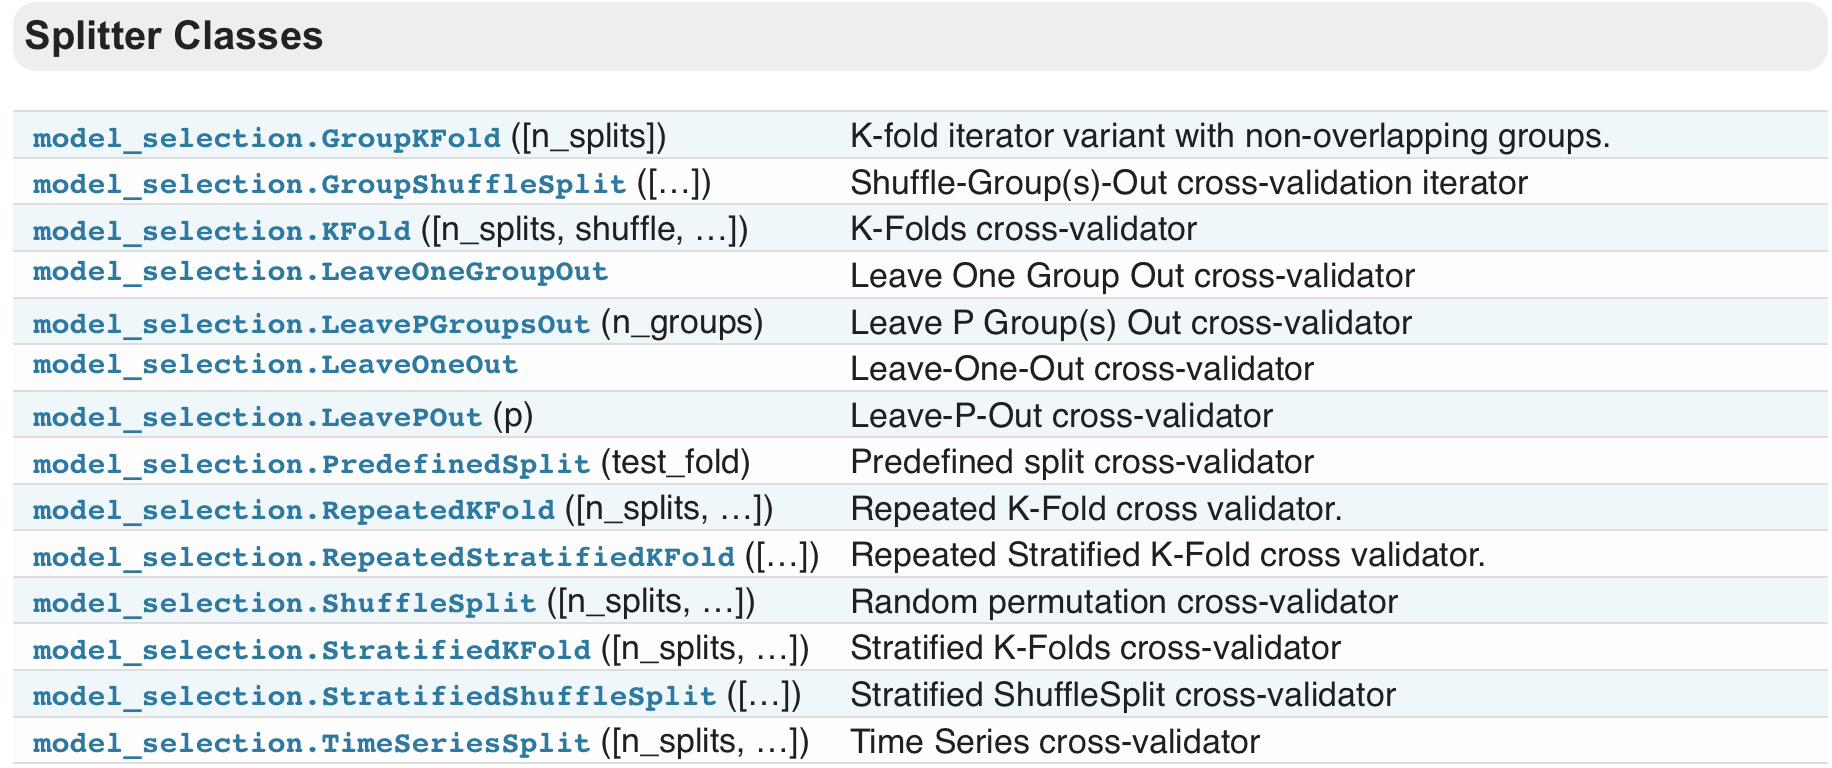

1. KFold

In [198]:
import sklearn.datasets as ds
from sklearn.model_selection import KFold, LeaveOneOut, LeavePOut, ShuffleSplit

# 加载数据集
data,target = ds.load_iris(return_X_y=True)  

# k折切分
kf = KFold(n_splits=5)
result_split = kf.split(data)    # 返回生成器
for index_train, index_test in result_split:
    print(index_train.shape, index_test.shape)

# 返回下标，可以在原来数据上操作

data_test = data.take(index_test, axis=0)
data_train = data.take(index_train, axis=0)

print(data_train.shape, data_test.shape)

(120,) (30,)
(120,) (30,)
(120,) (30,)
(120,) (30,)
(120,) (30,)
(120, 4) (30, 4)


2. LeaveOneOut

In [199]:
import sklearn.datasets as ds
from sklearn.model_selection import KFold, LeaveOneOut, LeavePOut, ShuffleSplit

# 加载数据集
data,target = ds.load_iris(return_X_y=True)  

# 留一切分
loo = LeaveOneOut()
result_split = loo.split(data)    # 返回生成器

for index_train, index_test in result_split:
    print(index_train.shape, index_test.shape)
    break

# 返回下标，可以在原来数据上操作

data_test = data.take(index_test, axis=0)
data_train = data.take(index_train, axis=0)

print(data_train.shape, data_test.shape)


(149,) (1,)
(149, 4) (1, 4)


3. LeavePOut

In [200]:
import sklearn.datasets as ds
from sklearn.model_selection import KFold, LeaveOneOut, LeavePOut, ShuffleSplit

# 加载数据集
data,target = ds.load_iris(return_X_y=True)  

# 留p切分
lpo = LeavePOut(p=30)   # 留30个
result_split = lpo.split(data)    # 返回生成器

for index_train, index_test in result_split:
    print(index_train.shape, index_test.shape)
    break

# 返回下标，可以在原来数据上操作

data_test = data.take(index_test, axis=0)
data_train = data.take(index_train, axis=0)

print(data_train.shape, data_test.shape)



(120,) (30,)
(120, 4) (30, 4)


4. ShuffleSplit

In [201]:
import sklearn.datasets as ds
from sklearn.model_selection import KFold, LeaveOneOut, LeavePOut, ShuffleSplit

# 加载数据集
data,target = ds.load_iris(return_X_y=True)  

# 随机切分
ss = ShuffleSplit(n_splits=2, test_size=0.20)    # 生成的重复次数
result_split = ss.split(data)    # 返回生成器

for index_train, index_test in result_split:
    print(index_train.shape, index_test.shape)
    # break

# 返回下标，可以在原来数据上操作

data_test = data.take(index_test, axis=0)
data_train = data.take(index_train, axis=0)

print(data_train.shape, data_test.shape)



(120,) (30,)
(120,) (30,)
(120, 4) (30, 4)


## KNN的k的选择

- 使用K折交叉验证，其他的可以自己使用

In [213]:
import numpy as np
import sklearn.datasets as ds
from sklearn.model_selection import KFold, LeaveOneOut, LeavePOut, ShuffleSplit
from sklearn.model_selection import train_test_split


def knn(train_data, train_label, sample, k):
    """
    train_data：训练集
    train_label：训练集的分类标签
    sample：待分类样本
    k：用来分类判定的前K个距离的个数
    """
    # 1. 计算待分类样本sample与所有训练集的距离
    distances = []   # 存放sample到所有训练集的距离
    for s in train_data:
        diff = s - sample
        distance = np.sqrt(np.dot(diff, diff))
        distances.append(distance)
    # 2. 对距离排序（从小到大），取前K个来统计分类(返回排序后的下标)
    distances_np = np.array(distances)   # 转换为ndarray，利用其中的返回排序后的下标功能
    sorted_index = distances_np.argsort()  
    # 3. 统计前K个距离对应训练样本的分类数量
    categories = {}   # 存放前k个距离的类别统计
    for i in range(k):
        # 取排序下标，在target标签中得到类别
        idx = sorted_index[i]    # 取下标
        category = train_label[idx]   # 取列别
        if category not in categories:
            categories[category] = 0
        categories[category] += 1
    
    # 4. 分类数量最多的就是带分类样本的分类类别（返回类别下标）
    # 对统计的类别 categories 进行排序，其中最后一个就是最多的类别就是待分类样本的类别。
    categories_sorted = sorted(categories.items(), key= lambda x: x[1], reverse=True)   # 返回列表
    return categories_sorted[0][0]  # 第一个最大，取第一个数据的第一个值：就是类别
    
#  --- 数据加载与测试
# 数据加载
data, target = ds.load_iris(return_X_y=True)

# 生成交叉验证方案
kf = KFold(n_splits=5)
ss = ShuffleSplit(n_splits=10, test_size=0.20) 
result_split = ss.split(data)   

# 开始交叉验证
# 存放k=1，k=2，...，k=120的正确数，最高的那个k就是我们选择的k
k_rates = {}    # key对应k的值，value对应分类正确数

Ks = 120

for index_train, index_test in result_split:
    # 根据索引得到训练集与测试集
    data_train = data.take(index_train, axis=0)
    target_train = target.take(index_train)
    # 训练测试集，统计识别正确总数（对所有交叉方案统计的结果）
    for idx in index_test:
        sample = data[idx]
        # 训练取k
        for k in range(1, Ks+1):
            c = knn(data_train, target_train, sample, k)
            # 判定分类是否正确
            if c == target[idx]:  # 分类正确
                # 统计数据到k_rates
                if k not in k_rates:   # 如果字典中没有k对应的key，则增加一个
                    k_rates[k] = 0
                k_rates[k] +=1   # 正确数累加
                
          
# 选择正确最高的作为k
k_rates_sorted = sorted(k_rates.items(), key= lambda x: x[1], reverse=True)   
best_k = k_rates_sorted[0][0]
print(best_k, k_rates_sorted[0][1])
# k_rates_sorted



15 292


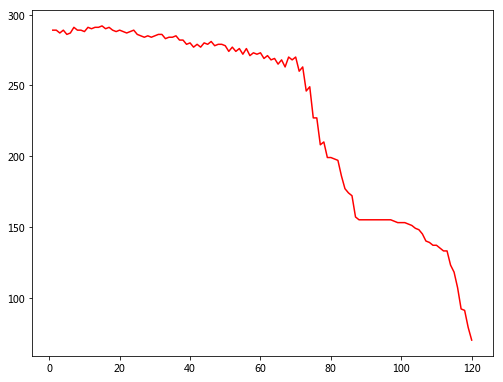

dict_keys([69, 71, 72, 55, 70, 57, 58, 65, 73, 76, 54, 59, 68, 75, 56, 66, 60, 64, 52, 53, 67, 74, 61, 63, 51, 62, 50, 47, 77, 78, 44, 48, 45, 46, 33, 49, 35, 36, 37, 38, 43, 90, 42, 31, 34, 40, 79, 105, 80, 84, 89, 91, 39, 28, 29, 41, 88, 107, 87, 27, 32, 24, 26, 92, 93, 30, 82, 83, 110, 106, 86, 85, 94, 114, 104, 23, 25, 81, 115, 117, 20, 113, 103, 19, 95, 108, 21, 22, 111, 116, 97, 98, 101, 14, 109, 112, 119, 102, 96, 18, 120, 99, 100, 1, 2, 17, 5, 12, 16, 118, 10, 6, 8, 9, 13, 15, 3, 7, 11, 4])

In [214]:
# 可视化
%matplotlib inline
import matplotlib.pyplot as plt

figure = plt.figure('KNN', figsize=(8, 6))

ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])

dict_sorted = dict(sorted(k_rates.items(), key= lambda x: x[0], reverse=False)) 

ax.plot(dict_sorted.keys(), dict_sorted.values(), color=(1, 0, 0, 1))

plt.show()
dict_data.keys()

## k选择的测试

- 根据上面的交叉验证，选择k=7，下面是测试结果。

In [218]:
import numpy as np
import sklearn.datasets as ds
from sklearn.model_selection import KFold, LeaveOneOut, LeavePOut, ShuffleSplit
from sklearn.model_selection import train_test_split

def knn(train_data, train_label, sample, k):
    """
    train_data：训练集
    train_label：训练集的分类标签
    sample：待分类样本
    k：用来分类判定的前K个距离的个数
    """
    # 1. 计算待分类样本sample与所有训练集的距离
    distances = []   # 存放sample到所有训练集的距离
    for s in train_data:
        diff = s - sample
        distance = np.sqrt(np.dot(diff, diff))
        distances.append(distance)
    # 2. 对距离排序（从小到大），取前K个来统计分类(返回排序后的下标)
    distances_np = np.array(distances)   # 转换为ndarray，利用其中的返回排序后的下标功能
    sorted_index = distances_np.argsort()  
    # 3. 统计前K个距离对应训练样本的分类数量
    categories = {}   # 存放前k个距离的类别统计
    for i in range(k):
        # 取排序下标，在target标签中得到类别
        idx = sorted_index[i]    # 取下标
        category = train_label[idx]   # 取列别
        if category not in categories:
            categories[category] = 0
        categories[category] += 1
    
    # 4. 分类数量最多的就是带分类样本的分类类别（返回类别下标）
    # 对统计的类别 categories 进行排序，其中最后一个就是最多的类别就是待分类样本的类别。
    categories_sorted = sorted(categories.items(), key= lambda x: x[1], reverse=True)   # 返回列表
    return categories_sorted[0][0]  # 第一个最大，取第一个数据的第一个值：就是类别
    
#  --- 数据加载与测试
# 数据加载
data, target = ds.load_iris(return_X_y=True)
# 使用第一个样本来测试，k=60

# data_train, data_test, target_train, target_test = train_test_split(
#     data,    # 数据集
#     target,    # 数据集标签
#     test_size=0.2)  

ss = ShuffleSplit(n_splits=1, test_size=0.20) 
result_split = ss.split(data) 
for index_train, index_test in result_split:
    data_test = data.take(index_test, axis=0)
    data_train = data.take(index_train, axis=0)
    target_test = target.take(index_test, axis=0)
    target_train = target.take(index_train, axis=0)

correct_counter = 0
for d, t in zip(data_test, target_test):
    c = knn(data_train, target_train, d, 17)
    if c==t:
        correct_counter += 1

print(F'训练集与测试集不重叠- 识别正确：{correct_counter}，测试样本数：{len(target_test)}')


correct_counter = 0
for d, t in zip(data_test, target_test):
    c = knn_v(data, target, d, 7)
    # print(c,t)
    if c==t:
        correct_counter += 1

print(F'训练集与测试集重叠- 识别正确：{correct_counter}，测试样本数：{len(target_test)}')

# for d in data[100:150]:
#     c = knn(data, target, d, 7)
#     print(c)

训练集与测试集不重叠- 识别正确：30，测试样本数：30
训练集与测试集重叠- 识别正确：30，测试样本数：30


# KNN的sklearn应用

In [219]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import sklearn.datasets as ds
from sklearn.model_selection import KFold, LeaveOneOut, LeavePOut, ShuffleSplit
from sklearn.model_selection import train_test_split


k_nn = KNeighborsClassifier(n_neighbors=7)

data, target = ds.load_iris(return_X_y=True)
# 使用第一个样本来测试，k=60

# data_train, data_test, target_train, target_test = train_test_split(
#     data,    # 数据集
#     target,    # 数据集标签
#     test_size=0.2)  

ss = ShuffleSplit(n_splits=1, test_size=0.20) 
result_split = ss.split(data) 
for index_train, index_test in result_split:
    data_test = data.take(index_test, axis=0)
    data_train = data.take(index_train, axis=0)
    target_test = target.take(index_test, axis=0)
    target_train = target.take(index_train, axis=0)

k_nn.fit(data_train, target_train) 


c = k_nn.predict(data_test)
print(c)
(c ==  target_test).sum()



[1 2 0 0 0 2 1 0 1 2 2 2 0 2 0 2 0 2 0 1 2 2 1 0 0 2 2 0 0 2]


29

# KNN的手写数字识别

- 代码来自《机器学习实战》一书的源代码，并使用sklearn的KNeighborsClassifier类改写。

In [211]:
import numpy as np
import operator
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as kNN

'''
函数说明：将32*32的二进制图片转换为1*1024向量
Parameters:
    filename - 文件名
Returns:
    returnVect - 返回的二进制图像的1*1024向量
'''
def img2vector(filename):
    #创建1*1024的0向量
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    #按行读取
    for i in range(32):
        #读一行数据
        lineStr=fr.readline()
        #每一行的前32个数据依次添加到returnVect
        for j in range(32):
            returnVect[0,32*i+j]=int(lineStr[j])
    return returnVect

'''
函数说明：手写数字分类测试
Parameters:
    filename - 无
Returns:
    returnVect - 无
'''
def handwritingClassTest():
    #测试集的labels
    hwLabels=[]
    #返回trainingDigits目录下的文件名
    trainingFileList=listdir('digits/trainingDigits')
    #返回文件夹下文件的个数
    m=len(trainingFileList)
    #初始化训练的Mat矩阵的测试集
    trainingMat=np.zeros((m,1024))
    
    #从文件名中解析出训练集的类别
    for i in range(m):
        fileNameStr=trainingFileList[i]
        classNumber = int(fileNameStr.split('_')[0])
        #将获取的类别添加到hwLabels中
        hwLabels.append(classNumber)
        #将每一个文件的1*1024数据存储到trainingMat矩阵中
        trainingMat[i,:]=img2vector('digits/trainingDigits/%s'%(fileNameStr))
        
        
    #构建KNN分类器
    neigh = kNN(n_neighbors=3,algorithm='auto')
    #拟合模型，trainingMat为测试矩阵,hwLabels为对应的标签
    neigh.fit(trainingMat,hwLabels)
    #返回testDigits目录下的文件列表
    testFileList=listdir('digits/testDigits')
    errorCount=0.0
    mTest=len(testFileList)
    #从文件中解析出测试集的类别并进行分类测试
    for i in range(mTest):
        fileNameStr=testFileList[i]
        classNumber=int(fileNameStr.split('_')[0])
        #获得测试集的1*1024向量用于训练
        vectorUnderTest=img2vector('digits/testDigits/%s'%(fileNameStr))
        #获得预测结果
        classifierResult=neigh.predict(vectorUnderTest)
        print ("分类返回结果%d\t真实结果%d"%(classifierResult,classNumber))
        if (classNumber != classifierResult):
            errorCount += 1.0
    print ("总共错了%d个\t错误率为%f%%"%(errorCount,errorCount/mTest*100))


handwritingClassTest()

分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果0	真实结果0
分类返回结果

分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果6	真实结果6
分类返回结果7	真实结果7
分类返回结果7	真实结果7
分类返回结果7	真实结果7
分类返回结果7	真实结果7
分类返回结果7	真实结果7
分类返回结果7	真实结果7
分类返回结果7	真实结果7
分类返回结果7	真实结果7
分类返回结果7	真实结果7
分类返回结果7	真实结果7
分类返回结果